# Prepaid to Postpaid Migration Prediction Model

## Objective: 

### To increase migration from Prepaid to Postpaid for Telco customers.

## Impact on Business:

### Increase in Postpaid Revenue and Postpaid subscriber base.

### Target Definition:
- Target = 0
    - Non Migrator
- Target = 1
    - Migrator
    
### Dependent Variables:
- Usage (Voice, SMS, Data, VAS)
    - unit: RM, mins, no.
- Demographic

In [1]:
import os
os.getcwd()

'C:\\Users\\11335\\Desktop\\Analysis\\2018\\Prepaid to Postpaid Migration (P2P)'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

## Loading Data

In [3]:
## read the data
file1 = pd.read_csv("data\mar17.csv", sep = "|", index_col = 'SUBSCRIBER_ARRANGEMENT_ID')
file2 = pd.read_csv("data\jul17.csv", sep = "|", index_col = 'SUBSCRIBER_ARRANGEMENT_ID')
file3 = pd.read_csv("data\oct17.csv", sep = "|", index_col = 'SUBSCRIBER_ARRANGEMENT_ID')

In [4]:
## concatenate all files

df = pd.concat([file1,file2,file3])
df.head()

,MSISDN,YEAR_,MONTH_,SUBSCRIPTION_STATUS,STATUS_TYPE,AGE,DEVICE_TYPE,ACTIVATION_DATE,GENDER,TOP_IDD_COUNTRY,...,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,SWX_AIRTIMEREBATE_FREE,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE,MIGRATOR
SUBSCRIBER_ARRANGEMENT_ID,,,,,,,,,,,,,,,,,,,,,
67985187,195382568,2017,2,ACTIVE_ACTIVE,UNKNOWN,22,BASIC PHONE,2009-07-02 00:00:00.000000,FEMALE,UNKNOWN,...,0,0,0,0,0.000000,0,0,0,0.0,0
134577152,134022015,2017,2,ACTIVE_ACTIVE,ADDREMOVEMODIFY VAS,36,SMART PHONE,2015-07-17 00:00:00.000000,FEMALE,UNKNOWN,...,12,12,22,0,315.995479,28,0,2,10.0,0
67356167,148319287,2017,2,ACTIVE_ACTIVE,ADDREMOVEMODIFY VAS,29,FEATURE PHONE,2011-07-02 00:00:00.000000,FEMALE,UNKNOWN,...,6,7,23,0,0.048926,28,24,1,0.0,0
69745825,136671242,2017,2,ACTIVE_ACTIVE,CHANGE SIM,24,SMART PHONE,2009-11-01 00:00:00.000000,FEMALE,UNKNOWN,...,9,10,22,0,929.121797,28,8,3,20.0,0
70076312,145030284,2017,2,ACTIVE_ACTIVE,CHANGE SIM,24,BASIC PHONE,2010-09-09 00:00:00.000000,MALE,UNKNOWN,...,12,13,19,0,32.495322,28,17,2,0.0,0


In [5]:
df.shape

(179428, 204)

In [7]:
df.describe()

,MSISDN,YEAR_,MONTH_,AGE,SUBSCRIPTION_TENURE,CHANGE_PHONE,SPECIAL_NO,GCG,IDD_USER,AVG_ACTIVE_DAY,...,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,SWX_AIRTIMEREBATE_FREE,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE,MIGRATOR
count,1.794280e+05,179428.0,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,...,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000,179428.000000
mean,2.618897e+08,2017.0,5.574760,32.740007,51.930065,0.635820,0.092137,0.020192,0.018375,3.952990,...,11.373247,11.757903,19.566706,0.004063,493.906751,25.838921,17.700688,2.643824,5.664318,0.083699
std,2.954485e+08,0.0,2.873404,14.740344,45.437238,0.481201,0.289220,0.140657,0.134304,2.725733,...,9.149106,9.443853,9.524582,0.064222,1047.879897,8.447730,11.337990,2.955104,10.893241,0.276937
min,1.020006e+08,2017.0,2.000000,-1348.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.370023e+08,2017.0,2.000000,22.000000,13.680000,0.000000,0.000000,0.000000,0.000000,1.133333,...,2.000000,2.000000,15.000000,0.000000,0.000000,28.000000,7.000000,1.000000,0.000000,0.000000
50%,1.485355e+08,2017.0,6.000000,29.000000,37.130000,1.000000,0.000000,0.000000,0.000000,4.464286,...,11.000000,11.000000,23.000000,0.000000,4.026563,29.000000,21.000000,2.000000,0.000000,0.000000
75%,1.972118e+08,2017.0,9.000000,42.000000,83.450000,1.000000,0.000000,0.000000,0.000000,6.766667,...,19.000000,20.000000,27.000000,0.000000,641.643738,30.000000,28.000000,4.000000,6.571429,0.000000
max,1.592537e+09,2017.0,9.000000,1507.000000,572.940000,1.000000,1.000000,1.000000,1.000000,7.000000,...,30.000000,30.000000,30.000000,2.000000,52619.252432,30.000000,30.000000,30.000000,100.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179428 entries, 67985187 to 141610111
Columns: 204 entries, MSISDN to MIGRATOR
dtypes: float64(114), int64(70), object(20)
memory usage: 280.6+ MB


In [8]:
df['MIGRATOR'].value_counts()

0    164410
1     15018
Name: MIGRATOR, dtype: int64

## Data Quality Checks


### Checking missing values

In [9]:
## check missing values

def check_null(df):
    
    missing=pd.concat([df.isnull().sum()], axis=1, keys=["NaN"]).sort_values("NaN", ascending=False)
    return missing[missing["NaN"]>0]

check_null(df)

,NaN
NETEXPIRY,7686


In [10]:
## check bill plan for missing netexpiry

df[df.NETEXPIRY.isnull()].NAME_PREPAID_BRAND.value_counts()

UOX_SOX        6669
LEGACY XPAX     300
X2              198
OFW             195
MAGIC            96
XPAX24           79
XPAX TURBO       72
OTHERS           48
IOX              29
Name: NAME_PREPAID_BRAND, dtype: int64

### Imputation of missing data

In [193]:
#Missing value treatment

df["NETEXPIRY"].fillna(">30DAYS_AF_EXP",inplace=True)

In [12]:
## check missing values again

def check_null(df):
    missing=pd.concat([df.isnull().sum()], axis=1, keys=["NaN"]).sort_values("NaN", ascending=False)
    return missing[missing["NaN"]>0]

check_null(df)

,NaN


## Data Exploratory

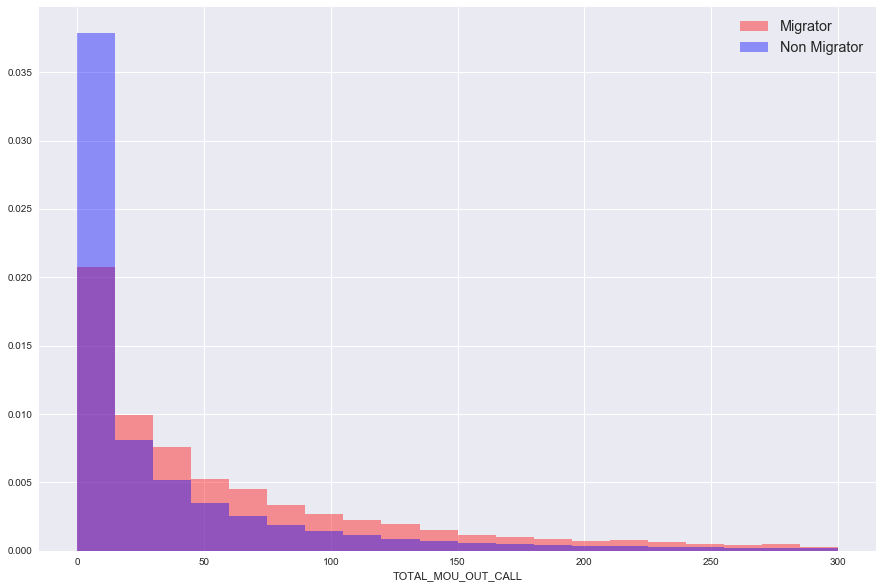

In [232]:
cols = "TOTAL_MOU_OUT_CALL"
bin_no = 20
constant=df[(df[cols]>= 0)&(df[cols] <= 300)]
plt.figure(figsize=(15,10))
_,bins = np.histogram(constant[cols], bins=bin_no, normed=True)
sns.distplot(constant[constant["MIGRATOR"]==1][cols], bins, hist=True, norm_hist=True, kde=False, kde_kws={"alpha":0.5}, color="red", label="Migrator")
sns.distplot(constant[constant["MIGRATOR"]==0][cols], bins, hist=True, norm_hist=True, kde=False, kde_kws={"alpha":0.5}, color="blue", label="Non Migrator")
plt.legend(fontsize="large")
plt.show()

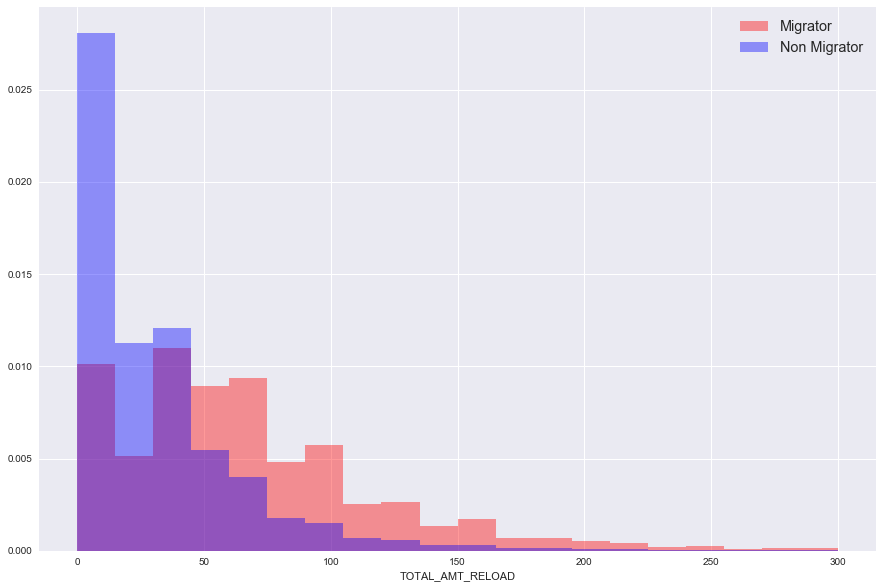

In [233]:
cols = "TOTAL_AMT_RELOAD"
bin_no = 20
constant=df[(df[cols]>= 0)&(df[cols] <= 300)]
plt.figure(figsize=(15,10))
_,bins = np.histogram(constant[cols], bins=bin_no, normed=True)
sns.distplot(constant[constant["MIGRATOR"]==1][cols], bins, hist=True, norm_hist=True, kde=False, kde_kws={"alpha":0.5}, color="red", label="Migrator")
sns.distplot(constant[constant["MIGRATOR"]==0][cols], bins, hist=True, norm_hist=True, kde=False, kde_kws={"alpha":0.5}, color="blue", label="Non Migrator")
plt.legend(fontsize="large")
plt.show()

## Feature Engineering

In [13]:
# drop useless cols

columns=["MSISDN", "YEAR_","MONTH_","SUBSCRIPTION_STATUS","STATUS_TYPE","ACTIVATION_DATE", "TOP_IDD_COUNTRY", "DEVICE_BRAND", "BILL_PLAN", "AVG_SUBSCRIPTION_TENURE"]
df.drop(columns, axis=1, inplace=True)

## Data Preprocessing

### Create dummy variables

In [14]:
df = pd.get_dummies(df)

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

y = df.MIGRATOR
X = df.drop(["MIGRATOR"], axis=1)

X_train, X_test ,y_train, y_test = train_test_split(X, y, random_state=0)


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134571, 269)
(44857, 269)
(134571,)
(44857,)


### Data Preprocessing for Train Dataset

### Removing features with zero or low variances

In [17]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
selector.fit(X_train) 

f = np.vectorize(lambda x : not x) 

v = X_train.columns[f(selector.get_support())]

print('{} variables have too low variance.'.format(len(v)))
print("")
print('These variables are {}'.format(list(v)))

114 variables have too low variance.

These variables are ['SPECIAL_NO', 'GCG', 'IDD_USER', 'TOTAL_NUM_RELOAD_DENO4', 'TOTAL_NUM_RELOAD_DENO5', 'TOTAL_NUM_RELOAD_DENO6', 'TOTAL_DATA_VOL_4G', 'AVG_NUM_RELOAD', 'AVG_NUM_RELOAD_PINLESS', 'AVG_NUM_RELOAD_ONLINE', 'AVG_NUM_RELOAD_PHYSICAL', 'AVG_NUM_RELOAD_SOFTPIN', 'AVG_NUM_RELOAD_DENO1', 'AVG_NUM_RELOAD_DENO2', 'AVG_NUM_RELOAD_DENO3', 'AVG_NUM_RELOAD_DENO4', 'AVG_NUM_RELOAD_DENO5', 'AVG_NUM_RELOAD_DENO6', 'AVG_NUM_RELOAD_DENO7', 'AVG_AMT_PPU', 'AVG_AMT_OUT_CALL_IDD', 'AVG_AMT_OUT_SMS', 'AVG_AMT_OUT_SMS_ONNET', 'AVG_AMT_OUT_SMS_OFFNET', 'AVG_NUM_OUT_CALL_LESS_X_MIN_2', 'AVG_NUM_OUT_CALL_LESS_X_MIN_3', 'AVG_NUM_OUT_CALL_LESS_X_MIN_4', 'AVG_NUM_OUT_CALL_LESS_X_MIN_5', 'AVG_NUM_OUT_CALL_LESS_X_MIN_6', 'AVG_NUM_OUT_CALL_LESS_X_MIN_7', 'AVG_NUM_OUT_CALL_LESS_X_MIN_8', 'AVG_NUM_OUT_CALL_LESS_X_MIN_9', 'AVG_NUM_OUT_CALL_LESS_X_MIN_10', 'AVG_AMT_ATS_SEND', 'AVG_NUM_ATS_SEND', 'AVG_AMT_ATS_RCV', 'AVG_NUM_ATS_RCV', 'AVG_DATA_VOL_4G', 'SWX_ROAMING', 

In [19]:
X_train = X_train.drop(X_train[v], axis=1)

### Separate categorical and numerical variables

#### Categorical variables

In [20]:
X_train_cat = X_train[['DEVICE_TYPE_SMART PHONE','GENDER_FEMALE','GENDER_MALE','NETWORK_BANDS_3G','NETWORK_BANDS_LTE','RACE_MALAY',
                    'RACE_OTHERS','NAME_PREPAID_BRAND_LEGACY XPAX','NAME_PREPAID_BRAND_MAGIC','DEVICE_OS_TYPE_ANDROID',
                    'DEVICE_OS_TYPE_OTHERS', 'RELOAD_PERIOD_RELOAD_LAST_30DAYS','PREFERRED_LANGUAGE_BAHASA MELAYU',
                    'PREFERRED_LANGUAGE_ENGLISH','PREFERRED_LANGUAGE_UNKNOWN', 'ACTIVATION_REGION_CENTRAL',
                    'ACTIVATION_REGION_EASTERN','DEALER_REGION_UNKNOWN','NETEXPIRY_1-10DAYS_BF_EXP']]
X_train_cat.shape

(134571, 19)

##### Chi square 

In [21]:
from scipy.stats import chi2_contingency

cat_cols = list(X_train_cat.columns)

for i in cat_cols:
    a = pd.crosstab(X_train_cat[i], y_train)
    #print("p-value of {}: {:.3f}".format(i, chi2_contingency(a)[1]))
    if chi2_contingency(a)[1] > 0.05 :
        print("p-value of {}: {:.3f}".format(i, chi2_contingency(a)[1]))
        X_train_cat.drop([i], axis=1, inplace=True) 

p-value of NAME_PREPAID_BRAND_LEGACY XPAX: 0.609


C:\Users\11335\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


p-value of NAME_PREPAID_BRAND_MAGIC: 0.081


In [22]:
print(X_train_cat.shape)

(134571, 17)


#### Numerical variables

In [24]:
cols = ['DEVICE_TYPE_SMART PHONE','GENDER_FEMALE','GENDER_MALE','NETWORK_BANDS_3G','NETWORK_BANDS_LTE','RACE_MALAY','RACE_OTHERS',
 'DEVICE_OS_TYPE_ANDROID','DEVICE_OS_TYPE_OTHERS','RELOAD_PERIOD_RELOAD_LAST_30DAYS','PREFERRED_LANGUAGE_BAHASA MELAYU',
 'PREFERRED_LANGUAGE_ENGLISH','PREFERRED_LANGUAGE_UNKNOWN','ACTIVATION_REGION_CENTRAL','ACTIVATION_REGION_EASTERN',
 'DEALER_REGION_UNKNOWN','NETEXPIRY_1-10DAYS_BF_EXP', 'NAME_PREPAID_BRAND_LEGACY XPAX', 'NAME_PREPAID_BRAND_MAGIC' ]
X_train_numeric_cols=data.drop(cols, axis=1)
X_train_numeric_cols.shape

(134571, 136)

In [25]:
X_train_numeric_cols.describe()

,AGE,SUBSCRIPTION_TENURE,CHANGE_PHONE,AVG_ACTIVE_DAY,AVG_CREDIT_BALANCE,TOTAL_AMT_RELOAD,TOTAL_AMT_RELOAD_PINLESS,TOTAL_AMT_RELOAD_ONLINE,TOTAL_AMT_RELOAD_PHYSICAL,TOTAL_AMT_RELOAD_SOFTPIN,...,SWX_DATA_FREE,SWX_IDD_FREE,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE
count,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,...,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000,134571.000000
mean,32.743600,51.923985,0.635932,3.951832,14.626295,32.125439,6.395929,2.956320,14.538461,8.234505,...,11.233490,0.119937,11.364596,11.749745,19.544523,494.758048,25.825490,17.703012,2.641817,5.674858
std,14.997477,45.344733,0.481170,2.727290,56.083090,41.654611,19.279683,14.704526,25.875217,20.225242,...,12.644263,1.461254,9.153840,9.448758,9.535913,1053.611586,8.457559,11.336371,2.952086,10.923090
min,-1348.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,13.680000,0.000000,1.133333,1.046000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,15.000000,0.000000,28.000000,7.000000,1.000000,0.000000
50%,29.000000,37.160000,1.000000,4.464286,4.174667,20.000000,0.000000,0.000000,5.000000,0.000000,...,3.000000,0.000000,11.000000,11.000000,23.000000,4.099814,29.000000,21.000000,2.000000,0.000000
75%,42.000000,83.450000,1.000000,6.766667,11.840000,45.000000,0.000000,0.000000,20.000000,10.000000,...,27.000000,0.000000,19.000000,20.000000,27.000000,641.920259,30.000000,28.000000,4.000000,6.572381
max,1507.000000,572.940000,1.000000,7.000000,7774.286000,2035.000000,801.890000,500.000000,1700.000000,980.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,52619.252432,30.000000,30.000000,30.000000,100.000000


In [26]:
X_test_numeric_cols = X_test[X_train_numeric_cols.columns]
X_test_numeric_cols.shape

(44857, 136)

In [27]:
X_test_numeric_cols.describe()

,AGE,SUBSCRIPTION_TENURE,CHANGE_PHONE,AVG_ACTIVE_DAY,AVG_CREDIT_BALANCE,TOTAL_AMT_RELOAD,TOTAL_AMT_RELOAD_PINLESS,TOTAL_AMT_RELOAD_ONLINE,TOTAL_AMT_RELOAD_PHYSICAL,TOTAL_AMT_RELOAD_SOFTPIN,...,SWX_DATA_FREE,SWX_IDD_FREE,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE
count,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,...,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000
mean,32.729228,51.948307,0.635486,3.956464,14.595677,32.354985,6.470934,3.083354,14.550257,8.249326,...,11.241099,0.104978,11.399202,11.782375,19.633257,491.352859,25.879216,17.693716,2.649843,5.632697
std,13.940670,45.714134,0.481299,2.721082,47.383354,42.989320,19.737842,16.412144,26.157515,21.065014,...,12.632758,1.365864,9.134940,9.429185,9.490301,1030.500962,8.418137,11.342969,2.964165,10.803258
min,-24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,13.680000,0.000000,1.133333,1.050714,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,2.000000,15.000000,0.000000,28.000000,6.000000,1.000000,0.000000
50%,29.000000,37.000000,1.000000,4.464286,4.124000,20.000000,0.000000,0.000000,5.000000,0.000000,...,3.000000,0.000000,11.000000,11.000000,23.000000,3.784678,29.000000,21.000000,2.000000,0.000000
75%,42.000000,83.420000,1.000000,6.766667,11.818333,45.000000,0.000000,0.000000,20.000000,10.000000,...,27.000000,0.000000,19.000000,20.000000,27.000000,641.034238,30.000000,28.000000,4.000000,6.500000
max,131.000000,572.940000,1.000000,7.000000,2291.176786,1330.000000,759.430000,760.000000,1280.000000,1130.000000,...,30.000000,30.000000,29.000000,30.000000,30.000000,31644.491719,30.000000,30.000000,30.000000,100.000000


### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_numeric_cols)
scaled_X_test = scaler.transform(X_test_numeric_cols)

In [29]:
X_train_num = pd.DataFrame(scaled_X_train, columns=list(X_train_numeric_cols.columns), index=X_train_numeric_cols.index.values)
X_test_num = pd.DataFrame(scaled_X_test, columns=list(X_test_numeric_cols.columns), index=X_test_numeric_cols.index.values)

In [30]:
X_train_num.describe()

,AGE,SUBSCRIPTION_TENURE,CHANGE_PHONE,AVG_ACTIVE_DAY,AVG_CREDIT_BALANCE,TOTAL_AMT_RELOAD,TOTAL_AMT_RELOAD_PINLESS,TOTAL_AMT_RELOAD_ONLINE,TOTAL_AMT_RELOAD_PHYSICAL,TOTAL_AMT_RELOAD_SOFTPIN,...,SWX_DATA_FREE,SWX_IDD_FREE,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE
count,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,...,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05,1.345710e+05
mean,1.221641e-16,-2.231031e-16,5.347973e-16,6.708929e-16,2.185082e-16,-2.619874e-16,5.630035e-16,-7.557096e-15,-1.343222e-15,3.009320e-16,...,-2.871518e-15,-3.199550e-17,-1.010785e-16,-2.918107e-16,2.032183e-16,5.367221e-17,1.506723e-15,1.015647e-15,1.019802e-16,-2.083628e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-9.206540e+01,-1.078938e+00,-1.321643e+00,-1.449001e+00,-2.607978e-01,-7.712365e-01,-3.317458e-01,-2.010491e-01,-5.618703e-01,-4.071415e-01,...,-8.884291e-01,-8.207825e-02,-1.241516e+00,-1.243527e+00,-2.049578e+00,-4.695847e-01,-3.053551e+00,-1.561618e+00,-8.949018e-01,-5.195306e-01
25%,-7.163631e-01,-8.434084e-01,-1.321643e+00,-1.033447e+00,-2.421469e-01,-6.512014e-01,-3.317458e-01,-2.010491e-01,-5.618703e-01,-4.071415e-01,...,-8.884291e-01,-8.207825e-02,-1.023028e+00,-1.031859e+00,-4.765710e-01,-4.695847e-01,2.571094e-01,-9.441339e-01,-5.561570e-01,-5.195306e-01
50%,-2.496162e-01,-3.255955e-01,7.566342e-01,1.878994e-01,-1.863604e-01,-2.910958e-01,-3.317458e-01,-2.010491e-01,-3.686344e-01,-4.071415e-01,...,-6.511665e-01,-8.207825e-02,-3.982995e-02,-7.934887e-02,3.623659e-01,-4.656935e-01,3.753473e-01,2.908339e-01,-2.174123e-01,-5.195306e-01
75%,6.171994e-01,6.952546e-01,7.566342e-01,1.032104e+00,-4.968173e-02,3.090800e-01,-3.317458e-01,-2.010491e-01,2.110730e-01,8.729198e-02,...,1.246935e+00,-8.207825e-02,8.341235e-01,8.731608e-01,7.818344e-01,1.396746e-01,4.935851e-01,9.083177e-01,4.600773e-01,8.216777e-02
max,9.830066e+01,1.149015e+01,7.566342e-01,1.117659e+00,1.383606e+02,4.808308e+01,4.126090e+01,3.380221e+01,6.513831e+01,4.804734e+01,...,1.484197e+00,2.044832e+01,2.035809e+00,1.931505e+00,1.096436e+00,4.947239e+01,4.935851e-01,1.084742e+00,9.267441e+00,8.635422e+00


In [31]:
X_test_num.describe()

,AGE,SUBSCRIPTION_TENURE,CHANGE_PHONE,AVG_ACTIVE_DAY,AVG_CREDIT_BALANCE,TOTAL_AMT_RELOAD,TOTAL_AMT_RELOAD_PINLESS,TOTAL_AMT_RELOAD_ONLINE,TOTAL_AMT_RELOAD_PHYSICAL,TOTAL_AMT_RELOAD_SOFTPIN,...,SWX_DATA_FREE,SWX_IDD_FREE,SWX_ROAMING_FREE,SWX_VOICE_INCOMING,SWX_SMS_INCOMING,DIFFERENCE_DATA_VOLUME,IF_HAS_CREDIT,IF_HAS_1_CREDIT,IF_RELOAD,AVG_MI_REVENUE
count,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,...,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000,44857.000000
mean,-0.000958,0.000536,-0.000927,0.001698,-0.000546,0.005511,0.003890,0.008639,0.000456,0.000733,...,0.000602,-0.010237,0.003781,0.003453,0.009305,-0.003232,0.006352,-0.000820,0.002719,-0.003860
std,0.929538,1.008150,1.000272,0.997727,0.844881,1.032046,1.023768,1.116133,1.010914,1.041525,...,0.999094,0.934724,0.997939,0.997932,0.995220,0.978069,0.995342,1.000586,1.004095,0.989033
min,-3.783557,-1.078938,-1.321643,-1.449001,-0.260798,-0.771237,-0.331746,-0.201049,-0.561870,-0.407142,...,-0.888429,-0.082078,-1.241516,-1.243527,-2.049578,-0.469585,-3.053551,-1.561618,-0.894902,-0.519531
25%,-0.716363,-0.843408,-1.321643,-1.033447,-0.242063,-0.651201,-0.331746,-0.201049,-0.561870,-0.407142,...,-0.888429,-0.082078,-1.023028,-1.031859,-0.476571,-0.469585,0.257109,-1.032346,-0.556157,-0.519531
50%,-0.249616,-0.329124,0.756634,0.187899,-0.187264,-0.291096,-0.331746,-0.201049,-0.368634,-0.407142,...,-0.651167,-0.082078,-0.039830,-0.079349,0.362366,-0.465993,0.375347,0.290834,-0.217412,-0.519531
75%,0.617199,0.694593,0.756634,1.032104,-0.050068,0.309080,-0.331746,-0.201049,0.211073,0.087292,...,1.246935,-0.082078,0.834123,0.873161,0.781834,0.138834,0.493585,0.908318,0.460077,0.075541
max,6.551553,11.490154,0.756634,1.117659,40.592609,31.158120,39.058571,51.483909,48.906498,55.463845,...,1.484197,20.448315,1.926565,1.931505,1.096436,29.564832,0.493585,1.084742,9.267441,8.635422


In [32]:
print(X_train_num.shape)
print(X_test_num.shape)

(134571, 136)
(44857, 136)


### Outliers Treatment

In [33]:
# Outlier Treatment
data_Col = list(X_train_num.columns.values)

for i in data_Col:
    low_mask= -3 * X_train_num[i].std() + X_train_num[i].mean()
    high_mask= 3 * X_train_num[i].std() + X_train_num[i].mean()
    X_train_num[i] = round(X_train_num[i].apply(lambda x: \
                        low_mask if x < low_mask else high_mask if x > high_mask else x),2)

In [34]:
# concat category and numerical columns

X_train = pd.concat([X_train_cat, X_train_num], axis=1)

### Multicollinearity

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif = pd.DataFrame(vif.sort_values(by="VIF Factor", ascending=False))
vif

,VIF Factor,features
39,20.795993,TOTAL_MOU_IN_CALL
50,14.894159,AVG_MOU_IN_CALL_ONNET
0,12.475639,DEVICE_TYPE_SMART PHONE
7,9.373885,RELOAD_PERIOD_RELOAD_LAST_30DAYS
46,9.139048,AVG_AMT_RELOAD
10,8.455797,PREFERRED_LANGUAGE_UNKNOWN
3,7.997547,NETWORK_BANDS_LTE
31,7.888376,TOTAL_AMT_OUT_CALL_DOMESTIC
2,7.350929,NETWORK_BANDS_3G
8,7.339027,PREFERRED_LANGUAGE_BAHASA MELAYU


In [57]:
# writer = pd.ExcelWriter('vif4.xlsx')
# vif.to_excel(writer,'Sheet1')
# writer.save()

In [60]:
# writer = pd.ExcelWriter('output5.xlsx')
# X_train.corr().to_excel(writer,'Sheet1')
# writer.save()

In [39]:
cols = ['DEVICE_OS_TYPE_ANDROID','GENDER_MALE','SWX_DATA','TOTAL_DATA_REVENUE','TOTAL_AMT_RELOAD_PINLESS',
        'TOTAL_AMT_RELOAD_ONLINE','TOTAL_AMT_RELOAD_PHYSICAL','TOTAL_AMT_RELOAD_SOFTPIN','TOTAL_AMT_REVENUE','TOTAL_NUM_RELOAD',
        'AVG_KB_PPU','TOTAL_NUM_OUT_CALL_DOMESTIC','AVG_MOU_OUT_CALL_DOMESTIC','TOTAL_AMT_OUT_CALL','AVG_MOU_OUT_CALL_OFFNET',
        'AVG_MOU_OUT_CALL_IDD','TOTAL_NUM_OUT_SMS','TOTAL_NUM_OUT_SMS_OFFNET','TOTAL_NUM_OUT_CALL','TOTAL_NUM_OUT_CALL_LESS_X_MIN_6',
        'TOTAL_MOU_OUT_CALL','TOTAL_USAGE_REVENUE','AVG_NON_RECURRING_REVENUE','TOTAL_MOU_IN_CALL_DOMESTIC','TOTAL_NUM_IN_CALL_OFFNET',
        'TOTAL_NUM_IN_CALL','TOTAL_NUM_IN_SMS','TOTAL_DATA_VOLUME','TOTAL_AMT_ATS_SEND','TOTAL_AMT_ATS_RCV','AVG_DATA_VOL_3G',
        'AVG_DATA_REVENUE','AVG_USAGE_REVENUE','AVG_ACTIVE_DAY','TOTAL_AMT_RELOAD','AVG_AMT_RELOAD_PINLESS','AVG_AMT_RELOAD_ONLINE',
        'IF_RELOAD','TOTAL_NUM_RELOAD_SOFTPIN','TOTAL_NUM_OUT_CALL_LESS_X_MIN_1','AVG_NUM_OUT_CALL_LESS_X_MIN_1','TOTAL_MOU_OUT_CALL_ONNET',
        'AVG_AMT_OUT_CALL_DOMESTIC','TOTAL_NUM_OUT_CALL_OFFNET','TOTAL_NUM_OUT_CALL_IDD','AVG_NUM_OUT_SMS_ONNET','TOTAL_AMT_OUT_SMS_OFFNET',
        'AVG_NUM_OUT_CALL','TOTAL_NUM_OUT_CALL_LESS_X_MIN_3','AVG_MOU_OUT_CALL','TOTAL_RECURRING_REVENUE','AVG_MOU_IN_CALL',
        'TOTAL_MOU_IN_CALL_OFFNET','AVG_NUM_IN_CALL_DOMESTIC','AVG_NUM_IN_SMS_ONNET','AVG_DATA_VOL_2G','TOTAL_NUM_RELOAD_PHYSICAL',
        'AVG_NUM_OUT_CALL_ONNET','TOTAL_AMT_OUT_SMS','AVG_NUM_OUT_SMS','AVG_AMT_OUT_CALL_ONNET','AVG_AMT_OUT_CALL_OFFNET',
        'TOTAL_MOU_OUT_CALL_IDD','TOTAL_AMT_OUT_CALL_ONNET','TOTAL_MOU_OUT_CALL_DOMESTIC','TOTAL_NUM_OUT_SMS_ONNET','AVG_AMT_OUT_CALL',
        'TOTAL_NUM_OUT_CALL_LESS_X_MIN_2','TOTAL_NUM_OUT_CALL_LESS_X_MIN_4','TOTAL_NUM_OUT_CALL_LESS_X_MIN_7','TOTAL_MOU_IN_CALL_ONNET',
        'AVG_NUM_IN_CALL_ONNET','SWX_VOICE_INCOMING','AVG_NUM_IN_SMS_OFFNET','AVG_DATA_VOLUME','AVG_AMT_REVENUE','TOTAL_MI_REVENUE',
        'AVG_NUM_IN_CALL_OFFNET','AVG_NUM_IN_CALL','AVG_NUM_OUT_CALL_DOMESTIC','AVG_NUM_OUT_CALL_OFFNET','AVG_NUM_OUT_CALL_IDD',
        'AVG_MOU_OUT_CALL_ONNET','AVG_MOU_IN_CALL_DOMESTIC','TOTAL_NUM_IN_CALL_DOMESTIC','AVG_NUM_IN_SMS','TOTAL_DATA_VOL_2G',
        'AVG_RECURRING_REVENUE','TOTAL_NUM_IN_SMS_ONNET','SWX_VOICE','TOTAL_AMT_OUT_CALL_DOMESTIC','SWX_IDD','TOTAL_MOU_IN_CALL']
X_train.drop(cols, axis=1, inplace=True)

## Feature Selection

In [61]:
from sklearn.tree import ExtraTreeClassifier

ExtraTree = ExtraTreeClassifier(class_weight="balanced")
ExtraTree.fit(X_train, y_train)

ExtraTreeClassifier(class_weight='balanced', criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [62]:
variables=pd.DataFrame(sorted(zip(ExtraTree.feature_importances_, X_train), reverse=True),columns=["Score","Feature"])
variables

,Score,Feature
0,0.077115,AVG_MI_REVENUE
1,0.071870,TOTAL_NUM_MI
2,0.046850,SWX_ROAMING_FREE
3,0.034837,TOTAL_AMT_OUT_CALL_OFFNET
4,0.027952,SUBSCRIPTION_TENURE
5,0.026119,DEVICE_TYPE_SMART PHONE
6,0.024044,TOTAL_NUM_OUT_CALL_ONNET
7,0.022461,AVG_AMT_RELOAD_SOFTPIN
8,0.022082,TOTAL_NUM_IN_CALL_ONNET
9,0.021782,AGE


In [63]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(ExtraTree, threshold="median", prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(X_train.columns[sfm.get_support()])

Number of features before selection: 60
Number of features after selection: 30


In [66]:
X_train = X_train[selected_vars]
X_train.shape

(134571, 30)

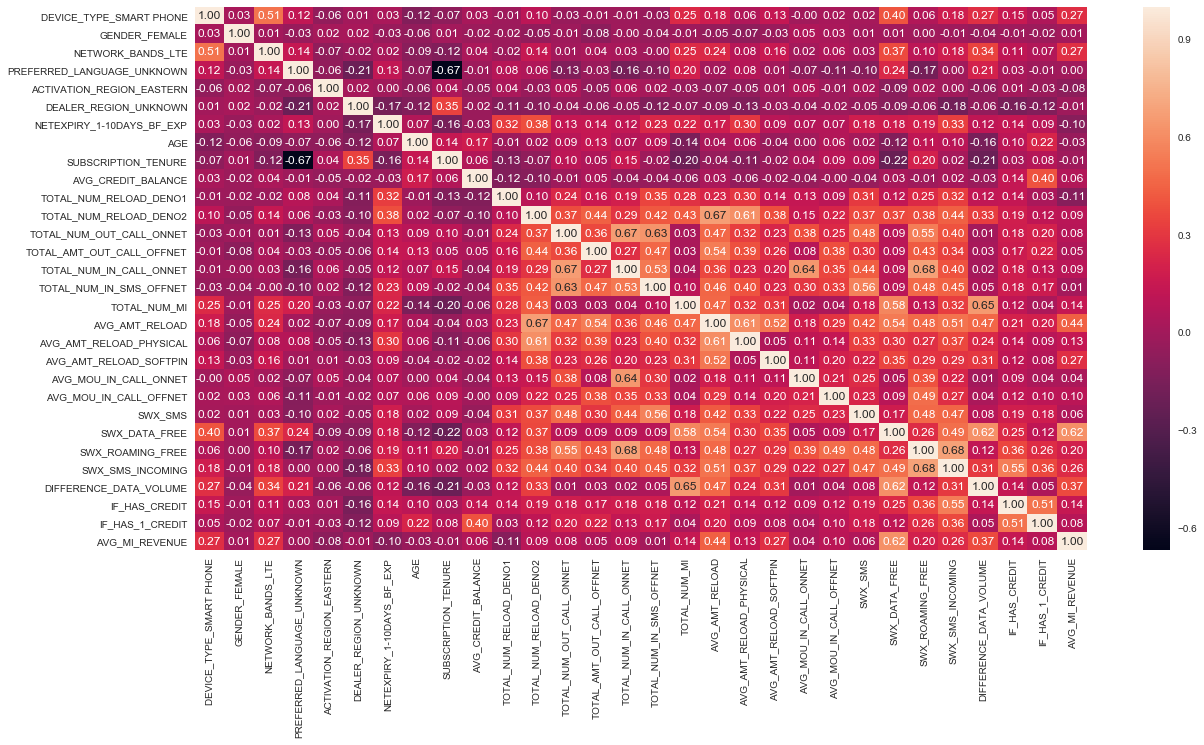

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,fmt=".2f")
plt.show()

### Data Preprocessing for Test Dataset

In [23]:
cat_cols = ['DEVICE_TYPE_SMART PHONE','GENDER_FEMALE','GENDER_MALE','NETWORK_BANDS_3G','NETWORK_BANDS_LTE','RACE_MALAY',
            'RACE_OTHERS','DEVICE_OS_TYPE_ANDROID','DEVICE_OS_TYPE_OTHERS','RELOAD_PERIOD_RELOAD_LAST_30DAYS',
            'PREFERRED_LANGUAGE_BAHASA MELAYU','PREFERRED_LANGUAGE_ENGLISH','PREFERRED_LANGUAGE_UNKNOWN',
            'ACTIVATION_REGION_CENTRAL','ACTIVATION_REGION_EASTERN','DEALER_REGION_UNKNOWN','NETEXPIRY_1-10DAYS_BF_EXP']
X_test_cat = X_test[cat_cols]
X_test_cat.shape

(44857, 17)

In [ ]:
X_test_num = pd.DataFrame(scaled_X_test, columns=list(X_test_numeric_cols.columns), index=X_test_numeric_cols.index.values)

## concat the cat and num cols
X_test = pd.concat([X_test_cat, X_test_num], axis=1)

## Train and Fit Model

In [68]:
X_test = X_test[X_train.columns]
X_test.shape

(44857, 30)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134571, 30)
(44857, 30)
(134571,)
(44857,)


In [231]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error, roc_curve, auc

def plot_confusion(X, y, title="Test Set"):
    score = roc_auc_score(X, y)
    plt.figure()
    sns.heatmap(confusion_matrix(X, y), annot=True, fmt="d", cbar=False)
    plt.title(title+"--"+str(score))
    plt.ylabel("True Value")
    plt.xlabel("Predicted Label")
#     plt.savefig("C:\Users\11335\Desktop\Analysis\2018\Prepaid to Postpaid Migration (P2P)\ " + title+ ".png")

### Gaussian Naive Bayes 

In [226]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)

print('Accuracy of GaussianNB classifier on Train Dataset: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on Test Dataset: {:.2f}'.format(nbclf.score(X_test, y_test)))
print('\n\nROC for Random Forest classifier:',roc_auc_score(y_test, nbclf.predict(X_test)))
print("")
print('Classification Report:\n',classification_report(y_test, nbclf.predict(X_test)))
print('MSE of GaussianNB classifier:', mean_squared_error(y_test, nbclf.predict(X_test))**0.5)

Accuracy of GaussianNB classifier on Train Dataset: 0.80
Accuracy of GaussianNB classifier on Test Dataset: 0.79


ROC for Random Forest classifier: 0.696646224151

Classification Report:
              precision    recall  f1-score   support

          0       0.95      0.81      0.87     40988
          1       0.22      0.59      0.32      3869

avg / total       0.89      0.79      0.83     44857

MSE of GaussianNB classifier: 0.460853584891


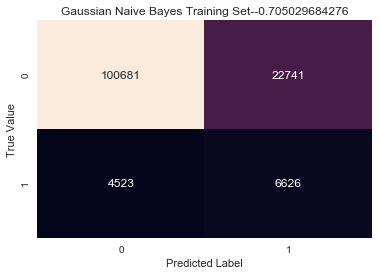

In [222]:
plot_confusion(y_train, nbclf.predict(X_train), title="Gaussian Naive Bayes Training Set")

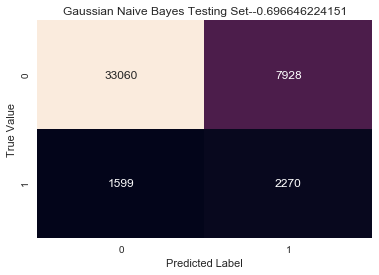

In [220]:
plot_confusion(y_test, nbclf.predict(X_test), title="Gaussian Naive Bayes Testing Set")

ROC Curve


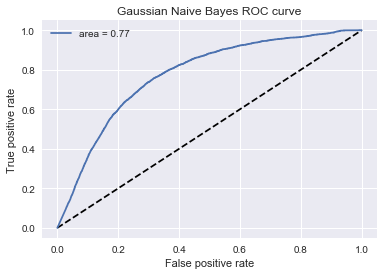

In [219]:
predict_proba_y_nbclf = nbclf.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_nbclf, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gaussian Naive Bayes ROC curve')
plt.legend(loc='best')
plt.show() 


### Random Forest Classifier

In [139]:
## default

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of Random Forest classifier on Train Dataset: {:.2f}'.format(rfclf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on Test Dataset: {:.2f}'.format(rfclf.score(X_test, y_test)))
print('\n\nROC for Random Forest classifier:',roc_auc_score(y_test, rfclf.predict(X_test)))
print("")
print('Classification Report:\n',classification_report(y_test, rfclf.predict(X_test)))
print('MSE of Random Forest classifier:', mean_squared_error(y_test, rfclf.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n',confusion_matrix(y_test, rfclf.predict(X_test)))

Accuracy of Random Forest classifier on Train Dataset: 0.99
Accuracy of Random Forest classifier on Test Dataset: 0.91


ROC for Random Forest classifier: 0.541022408187

Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     40988
          1       0.47      0.09      0.15      3869

avg / total       0.88      0.91      0.88     44857

MSE of Random Forest classifier: 0.295314186627


Confusion matrix :
 [[40590   398]
 [ 3514   355]]


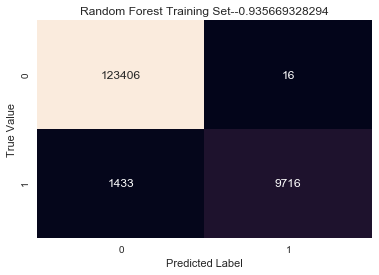

In [218]:
plot_confusion(y_train, rfclf.predict(X_train), title="Random Forest Training Set")

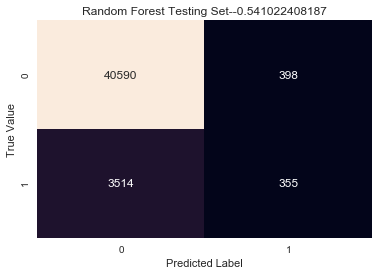

In [217]:
plot_confusion(y_test, rfclf.predict(X_test), title="Random Forest Testing Set")

ROC Curve


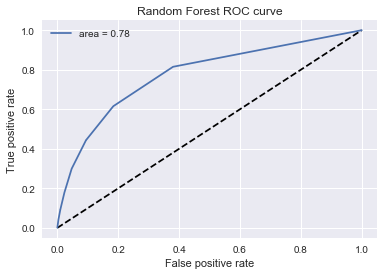

In [216]:
predict_proba_y_rfclf = rfclf.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_rfclf, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')
plt.show() 


### Grid Search Random Forest

In [145]:
## perform GridSearch

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 
param =[{'n_estimators' : [10,50,100,200,500,1000],
         'max_depth' : [4,5,6,7,8,9,10]}]

rf_grid = GridSearchCV(rf, param)
rf_grid.fit(X_train,y_train)

print(rf_grid)
print('')
print(rf_grid.best_score_) 
print(rf_grid.best_estimator_.n_estimators)
print(rf_grid.best_estimator_.max_depth)
print(rf_grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_depth': [4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

0.9192322268542257
200
10
{'max_depth': 10, 'n_estimators': 200}


In [149]:
from sklearn.ensemble import RandomForestClassifier

cv_rfclf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=5, class_weight="balanced").fit(X_train, y_train)

print('Accuracy of Random Forest classifier on Train Dataset: {:.2f}'.format(cv_rfclf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on Test Dataset: {:.2f}'.format(cv_rfclf.score(X_test, y_test)))
print('\n\nROC for Random Forest classifier:', roc_auc_score(y_test, cv_rfclf.predict(X_test)))
print("")
print('Classification Report:\n',classification_report(y_test, cv_rfclf.predict(X_test)))
print('MSE of Random Forest classifier:', mean_squared_error(y_test, cv_rfclf.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n', confusion_matrix(y_test, cv_rfclf.predict(X_test)))

Accuracy of Random Forest classifier on Train Dataset: 0.76
Accuracy of Random Forest classifier on Test Dataset: 0.76


ROC for Random Forest classifier: 0.756414885237

Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.76      0.85     40988
          1       0.23      0.75      0.35      3869

avg / total       0.91      0.76      0.81     44857

MSE of Random Forest classifier: 0.487533234825


Confusion matrix :
 [[31296  9692]
 [  970  2899]]


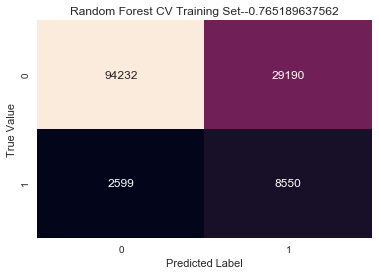

In [215]:
plot_confusion(y_train, cv_rfclf.predict(X_train), title="Random Forest CV Training Set")

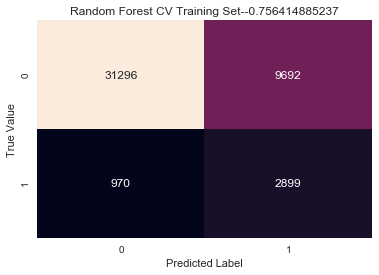

In [214]:
plot_confusion(y_test, cv_rfclf.predict(X_test), title="Random Forest CV Training Set")

ROC Curve


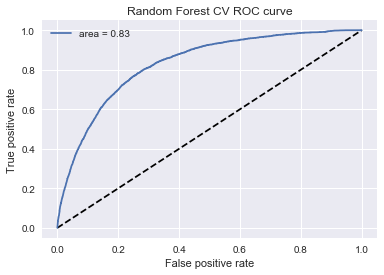

In [213]:
predict_proba_y_cv_rfclf = cv_rfclf.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_cv_rfclf, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest CV ROC curve')
plt.legend(loc='best')
plt.show() 


### Gradient Boosting Classifier

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=5, max_features="auto").fit(X_train ,y_train)

print('Accuracy of Gradient Boosting Classifier on Train Dataset: {:.2f}'.format(boost.score(X_train, y_train)))
print('Accuracy of Gradient Boosting Classifier on Test Dataset: {:.2f}'.format(boost.score(X_test, y_test)))
print('\n\nROC for Gradient Boosting Classifier:', roc_auc_score(y_test, boost.predict(X_test)))
print("")
print('Classification Report:\n', classification_report(y_test, boost.predict(X_test)))
print('MSE of Gradient Boosting Classifier:', mean_squared_error(y_test, boost.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n', confusion_matrix(y_test, boost.predict(X_test)))

Accuracy of Gradient Boosting Classifier on Train Dataset: 0.93
Accuracy of Gradient Boosting Classifier on Test Dataset: 0.92


ROC for Gradient Boosting Classifier: 0.570525905583

Classification Report:
              precision    recall  f1-score   support

          0       0.93      0.99      0.96     40988
          1       0.56      0.15      0.24      3869

avg / total       0.89      0.92      0.89     44857

MSE of Gradient Boosting Classifier: 0.289057790458


Confusion matrix :
 [[40519   469]
 [ 3279   590]]


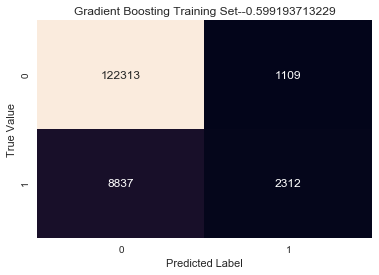

In [212]:
plot_confusion(y_train, boost.predict(X_train), title="Gradient Boosting Training Set")

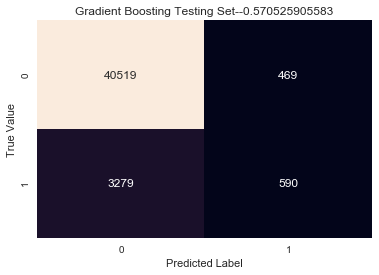

In [211]:
plot_confusion(y_test, boost.predict(X_test), title="Gradient Boosting Testing Set")

ROC Curve


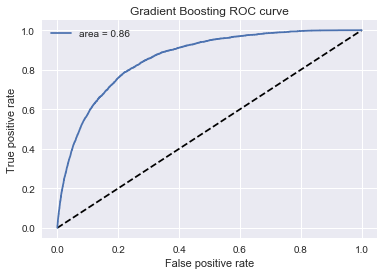

In [210]:
predict_proba_y_boost = boost.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_boost, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting ROC curve')
plt.legend(loc='best')
plt.show() 


### Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic Regression on Train Dataset: {:.2f}'.format(LR.score(X_train, y_train)))
print('Accuracy of Logistic Regression on Test Dataset: {:.2f}'.format(LR.score(X_test, y_test)))
print('\n\nROC for Logistic Regression:', roc_auc_score(y_test, LR.predict(X_test)))
print("")
print('Classification Report:\n', classification_report(y_test, LR.predict(X_test)))
print('MSE of Logistic Regression:', mean_squared_error(y_test, LR.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n', confusion_matrix(y_test, LR.predict(X_test)))

Accuracy of Logistic Regression on Train Dataset: 0.92
Accuracy of Logistic Regression on Test Dataset: 0.91


ROC for Logistic Regression: 0.557545891613

Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     40988
          1       0.47      0.13      0.20      3869

avg / total       0.88      0.91      0.89     44857

MSE of Logistic Regression: 0.296331539948


Confusion matrix :
 [[40419   569]
 [ 3370   499]]


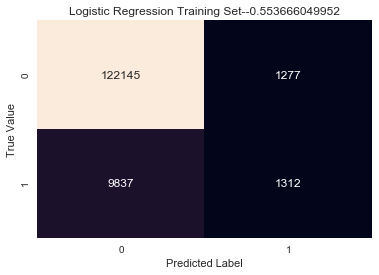

In [207]:
plot_confusion(y_train, LR.predict(X_train), title="Logistic Regression Training Set")

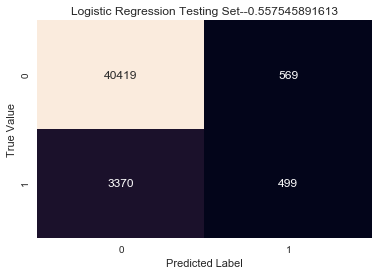

In [208]:
plot_confusion(y_test, LR.predict(X_test), title="Logistic Regression Testing Set")

ROC Curve


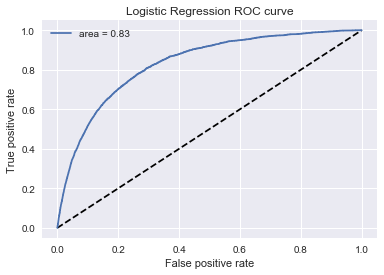

In [209]:
predict_proba_y_LR = LR.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_LR, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc='best')
plt.show() 

### Grid Search Logistic Regression

In [109]:
## perform GridSearch

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
param = [{'penalty': ['l1','l2']}]

grid_LR = GridSearchCV(LR, param)
grid_LR.fit(X_train,y_train)

print(grid_LR.best_score_)
print(grid_LR.best_estimator_.penalty)


0.917173833887
l1


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

lr = LogisticRegression(penalty='l1', class_weight='balanced' ).fit(X_train, y_train)
lr.fit(X_train, y_train)

print('Accuracy of Logistic Regression on Train Dataset: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression on Test Dataset: {:.2f}'.format(lr.score(X_test, y_test)))
print('\n\nROC for Logistic Regression:', roc_auc_score(y_test, lr.predict(X_test)))
print("")
print('Classification Report:\n', classification_report(y_test, lr.predict(X_test)))
print('MSE of Logistic Regression:', mean_squared_error(y_test, lr.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n',confusion_matrix(y_test, lr.predict(X_test)))

Accuracy of Logistic Regression on Train Dataset: 0.78
Accuracy of Logistic Regression on Test Dataset: 0.77


ROC for Logistic Regression: 0.755104514259

Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.78      0.86     40988
          1       0.24      0.73      0.36      3869

avg / total       0.91      0.77      0.82     44857

MSE of Logistic Regression: 0.476034664641


Confusion matrix :
 [[31856  9132]
 [ 1033  2836]]


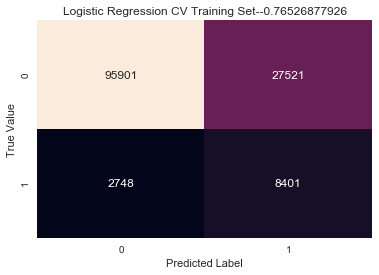

In [202]:
plot_confusion(y_train, lr.predict(X_train), title="Logistic Regression CV Training Set")

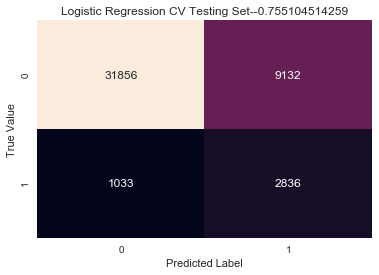

In [203]:
plot_confusion(y_test, lr.predict(X_test), title="Logistic Regression CV Testing Set")

ROC Curve


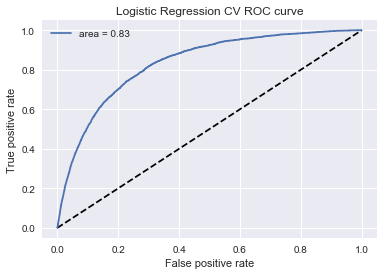

In [204]:
predict_proba_y_lr = lr.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_lr, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression CV ROC curve')
plt.legend(loc='best')
plt.show() 


### Logistic Regression with Bagging

In [130]:
LR_bag = BaggingClassifier(lr, max_samples=.5, max_features=14, n_jobs=2, oob_score=True)
LR_bag.fit(X_train,y_train)

print('Accuracy of Logistic Regression on Train Dataset: {:.2f}'.format(LR_bag.score(X_train, y_train)))
print('Accuracy of Logistic Regression on Test Dataset: {:.2f}'.format(LR_bag.score(X_test, y_test)))
print('\n\nROC for Logistic Regression:', roc_auc_score(y_test, LR_bag.predict(X_test)))
print("")
print('Classification Report:\n', classification_report(y_test, LR_bag.predict(X_test)))
print('MSE of Logistic Regression:', mean_squared_error(y_test, LR_bag.predict(X_test))**0.5)
print("")
print('\nConfusion matrix :\n', confusion_matrix(y_test, LR_bag.predict(X_test)))

Accuracy of Logistic Regression on Train Dataset: 0.76
Accuracy of Logistic Regression on Test Dataset: 0.76


ROC for Logistic Regression: 0.750413049802

Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.76      0.85     40988
          1       0.23      0.74      0.35      3869

avg / total       0.90      0.76      0.81     44857

MSE of Logistic Regression: 0.491744722407


Confusion matrix :
 [[31143  9845]
 [ 1002  2867]]


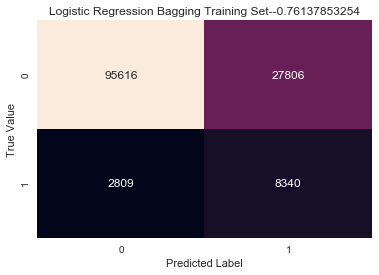

In [198]:
plot_confusion(y_train, LR_bag.predict(X_train), title="Logistic Regression Bagging Training Set")

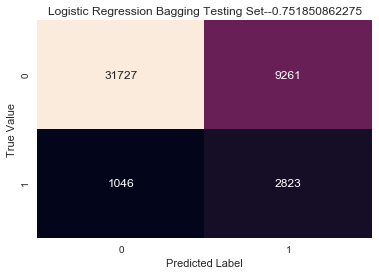

In [199]:
plot_confusion(y_test, LR_bag.predict(X_test), title="Logistic Regression Bagging Testing Set")

ROC Curve


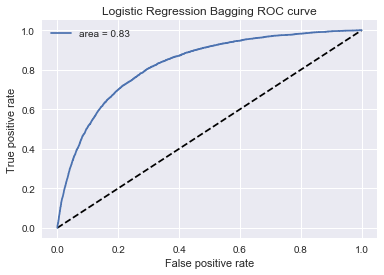

In [197]:
predict_proba_y_LR_bag = LR_bag.predict_proba(X_test)[:,1] 

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_y_LR_bag, pos_label=1)
auc_result = auc(fpr, tpr)
print('ROC Curve')
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='area = {0:0.2f}'.format(auc_result))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression Bagging ROC curve')
plt.legend(loc='best')
plt.show() 


### Voting

In [172]:
from sklearn.ensemble import VotingClassifier

Voting = VotingClassifier(
    estimators=[('cv_rfclf', cv_rfclf), 
                ('lr', LR)
                ], 
    voting='hard')

Voting.fit(X_train,y_train)

print('Accuracy of Voting classifier on training set: {:.2f}'.format(Voting.score(X_train, y_train)))
print('Accuracy of Voting classifier on testing set: {:.2f}'.format(Voting.score(X_test, y_test)))
print('\n\nROC for Logistic Regression:', roc_auc_score(y_test, Voting.predict(X_test)))
print("")
print('Classification Report:\n', classification_report(y_test, Voting.predict(X_test)))
print('MSE of Logistic Regression:', mean_squared_error(y_test, Voting.predict(X_test)**0.5))
print("")
print('\nConfusion matrix :\n', confusion_matrix(y_test, Voting.predict(X_test)))

Accuracy of Voting classifier on training set: 0.92
Accuracy of Voting classifier on testing set: 0.91


ROC for Logistic Regression: 0.557721626561

Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     40988
          1       0.48      0.13      0.20      3869

avg / total       0.88      0.91      0.89     44857

MSE of Logistic Regression: 0.087277348017


Confusion matrix :
 [[40444   544]
 [ 3371   498]]


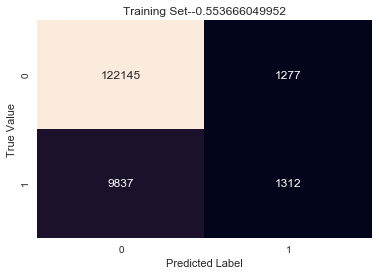

In [173]:
plot_confusion(y_train, Voting.predict(X_train), title="Training Set")

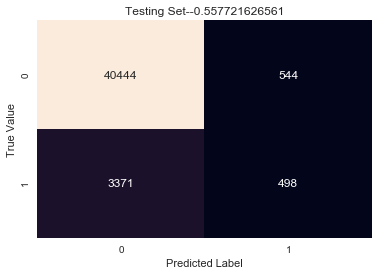

In [174]:
plot_confusion(y_test, Voting.predict(X_test), title="Testing Set")

## Conclusion:

#### Default:
    
#### Training Accuracy:
   - Gaussian Naive Bayes: 0.80
   - Random Forest       : 0.99
   - Logistic Regression : 0.92

#### Testing Accuracy:
   - Gaussian Naive Bayes: 0.79
   - Random Forest       : 0.91
   - Logistic Regression : 0.91

#### AUC:
   - Gaussian Naive Bayes: 0.70
   - Random Forest       : 0.54
   - Logistic Regression : 0.56 

#### GridSearch:
    
#### Training Accuracy:
   - Random Forest       : 0.76
   - Logistic Regression : 0.78

#### Testing Accuracy:
   - Random Forest       : 0.76
   - Logistic Regression : 0.77

#### AUC:
   - Random Forest       : 0.76
   - Logistic Regression : 0.76